In [1]:
import glob
import numpy as np
import seaborn as sns
import sys
sys.path.insert(0, "/Volumes/Transcend/repositories/Aglaia/data_manip/")
import data_utils as dau

In [2]:
data = dau.Data_extraction()

In [3]:
geoms, enes, idxs = data.import_molpro("/Volumes/Transcend/data_sets/ccsd", "_uCCSD_avtz.out")

The following file couldn't be read properly:/Volumes/Transcend/data_sets/ccsd/CH4CN_19829_uCCSD_avtz.out



In [4]:
print(geoms[idxs[0]])

['C', '1.948153', '3.622904', '2.081111', 'H', '2.049626', '3.765616', '1.000288', 'H', '2.693285', '2.923731', '2.34432', 'H', '2.305255', '4.578571', '2.579651', 'H', '0.8890423', '3.606824', '2.399583', 'C', '-0.4147356', '2.940226', '-2.453864', 'N', '-0.8764732', '1.892105', '-2.385047']


In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame()
df["Indices"] = idxs
df.head()

,Indices
0,2
1,3
2,4
3,5
4,6


In [8]:
def dist_sq(a, b):
    dist_squared = 0
    for i in range(len(a)):
        term = (b[i] - a[i])**2
        dist_squared += term
        
    return dist_squared

In [9]:
c0h = []
c5h = []
energies = []

for idx in idxs:
    # Getting C coordinates
    c0_xyz = [float(geoms[idx][1]), float(geoms[idx][2]), float(geoms[idx][3]) ]
    c5_xyz = [float(geoms[idx][21]), float(geoms[idx][22]), float(geoms[idx][23]) ]
    h1_xyz = [float(geoms[idx][5]), float(geoms[idx][6]), float(geoms[idx][7]) ]
    
    idx_closest_H = 1
    min_c5h_dist = dist_sq(c5_xyz, h1_xyz)
    
    for i in range(2, 5):
        h_xyz = [float(geoms[idx][4*i+1]), float(geoms[idx][4*i+2]), float(geoms[idx][4*i+3]) ]
        dist = dist_sq(c5_xyz, h_xyz)
        if dist < min_c5h_dist:
            min_c5h_dist = dist
            idx_closest_H = i
            
    c5h.append(min_c5h_dist)
    closest_H = [float(geoms[idx][4*idx_closest_H+1]), float(geoms[idx][4*idx_closest_H+2]), float(geoms[idx][4*idx_closest_H+3]) ]
    c0h_dist = dist_sq(c0_xyz, closest_H)
    c0h.append(c0h_dist)
    
    energies.append(enes[idx])
    

In [10]:
df["c0h"] = c0h
df["c5h"] = c5h

In [11]:
df["energies"] = energies

In [12]:
df.head()

,Indices,c0h,c5h,energies
0,2,1.198842,18.685513,-133.032821
1,3,14.838238,1.048558,-133.070001
2,4,14.825546,1.094260,-133.068409
3,5,14.605547,1.184331,-133.063998
4,6,7.811587,1.099887,-133.062377


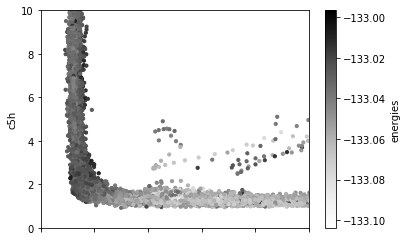

In [13]:
import matplotlib.pyplot as plt
df.plot.scatter(x='c0h', y='c5h', c='energies', s=10)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [14]:
df_prun1 = df.drop(df[df['c0h'] > 6.25].index)
df_prun2 = df_prun1.drop(df[df['c5h'] > 6.25].index)
df_prun3 = df_prun2.drop(df_prun2[(df_prun2['c0h'] > 4) & (df['c5h'] > 2.5)].index)
df_prun3.head()

/Users/walfits/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Indices,c0h,c5h,energies
6,8,6.201439,1.158733,-133.060852
7,9,5.433980,1.210086,-133.058382
8,10,4.653985,1.250318,-133.053694
10,12,1.600100,1.810148,-133.021768
11,13,1.539786,1.895539,-133.024668


In [15]:
df_prun2.head()

,Indices,c0h,c5h,energies
6,8,6.201439,1.158733,-133.060852
7,9,5.433980,1.210086,-133.058382
8,10,4.653985,1.250318,-133.053694
10,12,1.600100,1.810148,-133.021768
11,13,1.539786,1.895539,-133.024668


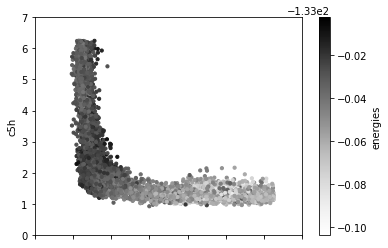

In [16]:
df_prun3.plot.scatter(x='c0h', y='c5h', c='energies', s=10)
plt.ylim(0,7)
plt.xlim(0,7)
plt.show()

In [50]:
n_bins = 20
df_binned = df_prun3.assign(
    c5h_cut=pd.qcut(df_prun2['c5h'], n_bins, labels=range(n_bins)),
    c0h_cut=pd.qcut(df_prun2['c0h'], n_bins, labels=range(n_bins))
)
df_binned.head()

,Indices,c0h,c5h,energies,c0h_cut,c5h_cut
6,8,6.201439,1.158733,-133.060852,19,1
7,9,5.433980,1.210086,-133.058382,18,2
8,10,4.653985,1.250318,-133.053694,15,3
10,12,1.600100,1.810148,-133.021768,7,11
11,13,1.539786,1.895539,-133.024668,6,12


In [51]:
df_2d_bin = df_binned.assign(cartesian=pd.Categorical(df_binned.filter(regex='_cut').apply(tuple, 1)))
df_2d_bin.head()

,Indices,c0h,c5h,energies,c0h_cut,c5h_cut,cartesian
6,8,6.201439,1.158733,-133.060852,19,1,"(19, 1)"
7,9,5.433980,1.210086,-133.058382,18,2,"(18, 2)"
8,10,4.653985,1.250318,-133.053694,15,3,"(15, 3)"
10,12,1.600100,1.810148,-133.021768,7,11,"(7, 11)"
11,13,1.539786,1.895539,-133.024668,6,12,"(6, 12)"


In [52]:
df_sorted = df_2d_bin.sort_values(by=["cartesian","energies"])
df_sorted.head()

,Indices,c0h,c5h,energies,c0h_cut,c5h_cut,cartesian
12326,14474,1.187843,1.624275,-133.018024,0,9,"(0, 9)"
12228,14365,1.179759,1.724640,-133.024218,0,10,"(0, 10)"
11409,13408,1.190321,1.793086,-133.027615,0,11,"(0, 11)"
3059,3608,1.193069,1.789562,-133.026499,0,11,"(0, 11)"
9667,11392,1.204818,2.000598,-133.024432,0,12,"(0, 12)"


In [53]:
df_final = df_sorted.drop_duplicates(subset="cartesian", keep="first")

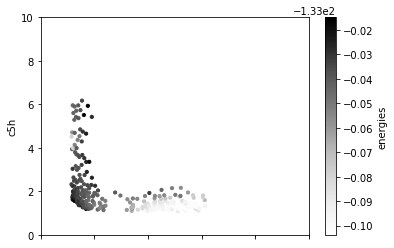

In [54]:
df_final.plot.scatter(x='c0h', y='c5h', c='energies', s=10)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [22]:
df_final

,Indices,c0h,c5h,energies,c0h_cut,c5h_cut,cartesian
11410,13409,1.358167,1.596017,-133.033312,0,2,"(0, 2)"
13946,16350,1.302561,3.156200,-133.037843,0,3,"(0, 3)"
8247,9742,1.206473,3.983276,-133.079256,0,4,"(0, 4)"
10293,12096,1.674298,1.235916,-133.035990,1,0,"(1, 0)"
12225,14362,1.650528,1.361552,-133.037219,1,1,"(1, 1)"
6475,7637,1.688382,1.555753,-133.042354,1,2,"(1, 2)"
16891,19817,1.681544,1.919419,-133.040301,1,3,"(1, 3)"
15243,17877,1.374301,4.363427,-133.052081,1,4,"(1, 4)"
9931,11692,3.378681,1.247853,-133.066853,2,0,"(2, 0)"
2199,2599,3.437630,1.311201,-133.070022,2,1,"(2, 1)"


In [30]:
np_final = df_final.index

In [31]:
np.savetxt("test_idx.txt", np_final, delimiter=" ", fmt="%s")

In [34]:
(df_final.energies * 2625) + 349312.31810359145

11410     99.873936
13946     87.979957
8247     -20.730081
10293     92.844280
12225     89.617417
6475      76.137664
16891     81.527775
15243     50.605905
9931      11.828560
2199       3.509995
15692     35.300969
12222     76.678007
15773    116.282687
11595    -83.023564
7138     -79.366016
7213     -51.520512
12659     72.741653
7229     -85.056046
7159     -82.538496
7224     -76.645031
12662     30.508450
Name: energies, dtype: float64